<span style="color:red;">**본 실습 파일의 코드는 mglearn 의 설치가 원활하지 않을 경우를 대비하여 mglearn 의 함수들을 별도로 직접 import 하여 적용한 코드입니다.**</span>
<br> 활용된 mglearn 의 함수들은 custom_mglearn.py 에서 확인하실 수 있습니다.
<br> 이처럼 라이브러리 내부에 구현된 함수들을 직접 꺼내어 필요한 경우에 활용할 수 있습니다.
<br>
<br>

#### Scikit-learn 라이브러리를 활용한 SVM (Support vector machine)

>데이터의 분포에 따라 linear model 로는 데이터를 제대로 분류해내기 어려울 수 있습니다. (선형 분리 불가능)
<br>linear model 의 이러한 한계를 극복하는 방법 중 하나는 기존의 특성(feature, column)끼리 곱하거나 
<br>특정 특성을 제곱하는 등의 방법으로 새로운 특성을 기존의 데이터에 추가한 후 모델링을 진행하는 것입니다.

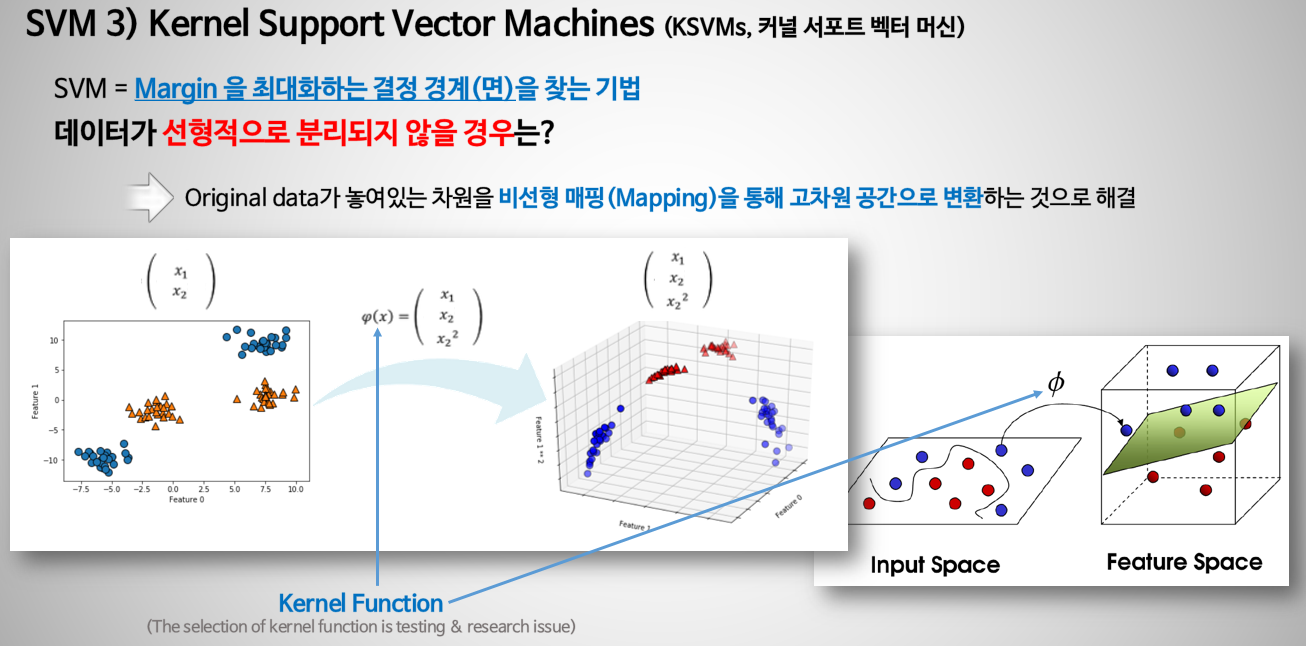

> 아래의 cell 부터 "RBF 커널 SVM을 유방암 데이터셋에 적용해보기" 전까지는 **HyperParameter 값 변화에 따른 SVM 모델의 시각화**를 위한 임시 코드입니다.
<br><span style="color:red;"><u>코드를 모두 이해할 필요가 없으니</u> Hyper-Parameter인 **C 와 Gamma 의 값 변화에 따른 모델의 변화 양상**에 주목해주세요.</span>
<br>(현재 mglearn 라이브러리의 설치가 원활하지 않습니다)

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import mglearn
import custom_mglearn
from sklearn.datasets import make_blobs
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

<br>

#### SVM for example data - 1 (Linear SVC)

<br>
<br>

#### 1. 데이터 준비

In [54]:
# make_blobs : Generate 100 random samples (x & y set)
# 간단한 선형 SVM으로 결정 경계가 어떻게 그려지는지 확인하고 커널을 적용해봅니다.

X, y = make_blobs(centers=4, random_state=8) # Generate isotropic Gaussian blobs for clustering.
X[:10]

array([[ -1.72161036,  -1.48033142],
       [ -3.6573384 ,  -9.5482383 ],
       [  7.0778163 ,   0.99508772],
       [ -1.36579859,  -0.3148625 ],
       [ -2.66521206,  -3.12591651],
       [  7.63027116,   8.69797933],
       [ -5.27144331, -12.11880698],
       [  7.91767139,   1.41547387],
       [ -1.41284184,   0.11296348],
       [ -1.01519039,  -1.03318203]])

In [55]:
y

array([3, 2, 1, 3, 3, 0, 2, 1, 3, 3, 0, 0, 3, 1, 1, 2, 2, 3, 3, 0, 0, 1,
       0, 0, 3, 0, 0, 3, 2, 1, 1, 3, 1, 3, 0, 2, 3, 0, 1, 2, 1, 3, 2, 2,
       0, 2, 1, 0, 1, 1, 1, 2, 0, 0, 3, 2, 2, 2, 0, 3, 3, 2, 1, 2, 0, 1,
       3, 1, 0, 0, 1, 2, 0, 1, 0, 0, 3, 2, 3, 1, 2, 0, 3, 2, 3, 2, 0, 2,
       2, 3, 1, 0, 3, 2, 2, 1, 1, 3, 1, 1])

In [56]:
y = y % 2 # label 0,1,2,3 -> label 0,1
y

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

<br>
<br>

#### 2. 비어있는 모델 객체 만들기 + 3. 모델 학습시키기

In [57]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


<br>
<br>

#### 3. 모델 시각화

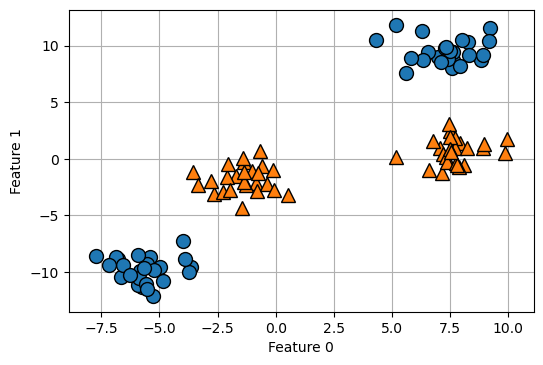

In [58]:
figure = plt.figure(dpi=100)

# custom_mglearn.plot_2d_separator(linear_svm, X) # Plot the linear decision boundary 
custom_mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.grid()
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

<br>

#### 새로운 Feature 를 데이터(X)에 추가하기 (2차원 -> 3차원)
2번째 열을 제곱하여 새로운 열로 추가하여 데이터의 차원을 확장합니다.

In [59]:
# import pandas as pd

# df = pd.DataFrame(X)
# df[2] = df[1] ** 2
# np.array(df)

In [60]:
# 2번째 열을 제곱하여 기존의 데이터에 추가
X_new = np.hstack([X, X[:, 1:] ** 2]) # X[:, 1:] == Feature1

In [61]:
X_new[:10]

array([[-1.72161036e+00, -1.48033142e+00,  2.19138111e+00],
       [-3.65733840e+00, -9.54823830e+00,  9.11688546e+01],
       [ 7.07781630e+00,  9.95087718e-01,  9.90199567e-01],
       [-1.36579859e+00, -3.14862498e-01,  9.91383928e-02],
       [-2.66521206e+00, -3.12591651e+00,  9.77135405e+00],
       [ 7.63027116e+00,  8.69797933e+00,  7.56548444e+01],
       [-5.27144331e+00, -1.21188070e+01,  1.46865483e+02],
       [ 7.91767139e+00,  1.41547387e+00,  2.00356628e+00],
       [-1.41284184e+00,  1.12963480e-01,  1.27607478e-02],
       [-1.01519039e+00, -1.03318203e+00,  1.06746511e+00]])

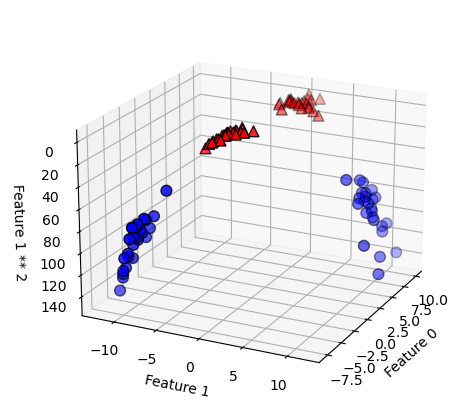

In [62]:
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure(dpi=100)

# 3차원 그래프
ax = Axes3D(figure, elev=-160, azim=-26)

mask = y == 0 # 일종의 slicing, array([False,  True, False, False, False, ... ]
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=ListedColormap(['#0000aa', '#ff2020']), s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=ListedColormap(['#0000aa', '#ff2020']), s=60, edgecolor='k')

ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1 ** 2")
plt.show()

<br>
<br>

#### 2. 비어있는 모델 객체 만들기 + 3. 모델 학습시키기

In [63]:
linear_svm_3d = LinearSVC().fit(X_new, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


<br>
<br>

#### 4. 모델 시각화

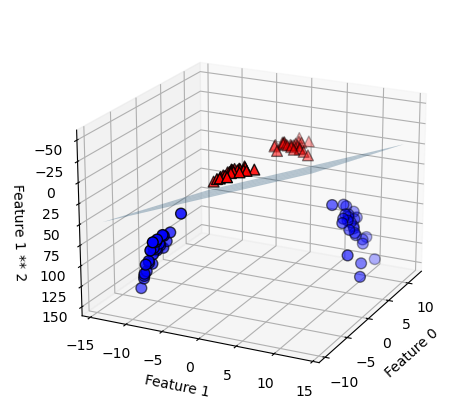

In [64]:
# 선형 결정 경계 그리기

figure = plt.figure(dpi=100)
ax = Axes3D(figure, elev=-160, azim=-26)

# 좌표계 생성
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)

# 선형 결정 경계 
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=ListedColormap(['#0000aa', '#ff2020']), s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=ListedColormap(['#0000aa', '#ff2020']), s=60, edgecolor='k')

ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1 ** 2")
plt.show()

<br>
<br>
결정 경계를 그린 후 기존의 좌표계로 되돌아옵니다. (위에서의 면이 아래의 곡선에 해당)

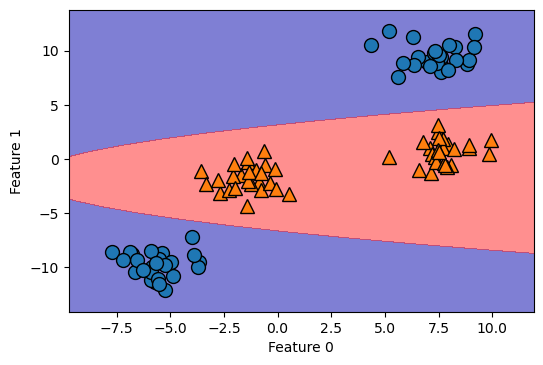

In [65]:
figure = plt.figure(dpi=100)

ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=ListedColormap(['#0000aa', '#ff2020']), alpha=0.5)

custom_mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

<br>
<br>
데이터의 열이 무수히 많을 경우 위와 같이 조합 가능한 추가 열(column, feature)이 방대해집니다.
<br>대신 Kernel Trick (https://goo.gl/1o8h2m)을 활용하여 보다 효율적으로 더 높은 차원에서의 선형 분리가 가능합니다.
<br>자주 활용되는 kernel function은 아래의 2가지가 있습니다.

- 다항 커널 (기존의 열들을 바탕으로 가능한 조합을 특정한 차수까지 기존의 데이터에 추가) 
- 가우시안 커널 == **RBF(radial basis function)**

<br>

#### SVM for example data - 2 (Kernelized SVC)

<br>
<br>

#### 1. 데이터 준비 + 2. 비어있는 모델 객체 만들기 + 3. 모델 학습시키기

In [1]:

from sklearn import linear_model

model = linear_model.LinearRegression()


from sklearn import svm

model = svm.SVC(C=1.0, kernel='rbf', gamma=0.1)


In [66]:
from sklearn.svm import SVC

X, y = custom_mglearn.make_handcrafted_dataset()

svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y) 

# RBF Kernel 상세 설명 @ https://goo.gl/sWtcax
# gamma 는 가우시안 커널의 폭을 제어하는 매개변수, 아래 cell 결과 그래프에서 확인
# gamma 의 기본값은 ‘auto’ == 데이터의 열의 수의 역수 == 1 / X_train.shape[1]

<br>
<br>

#### 4. 모델 시각화 (gamma 와 c 의 변화에 focus)

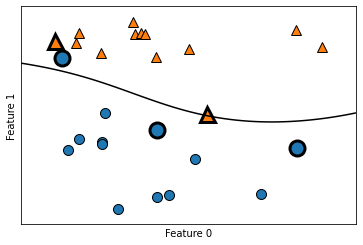

In [67]:
custom_mglearn.plot_2d_separator(svm, X, eps=.5) # eps : 그래프의 확대/축소
custom_mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# Gray Border @ support vectors
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
custom_mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

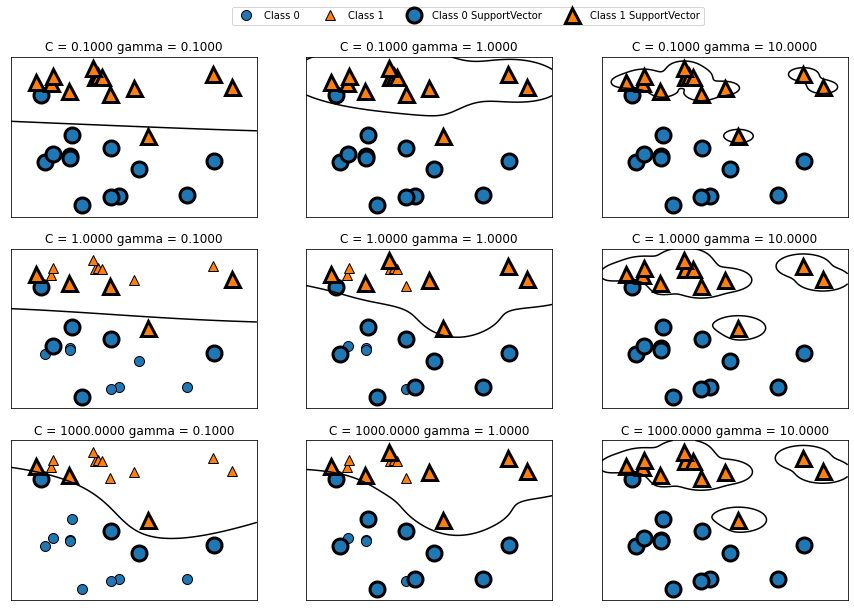

In [68]:
# Hyper-parameter C 와 gamma 에 따른 결정경계의 변화 
# (실행 시 시간이 오래 걸립니다)

fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# C가 작아질수록 제약이 큰 모델 (커질수록 오차를 허용하는 범위가 커짐, C값은 사실 3일차에 배울 L2/L1 Regularization 의 Regularization rate 인 lambda 의 역수에 해당
# 가우시안 커널 폭의 역수인 gamma 값이 작을수록 data point의 영향 범위가 커짐 (커널의 반경이 커짐), 
for ax, C in zip(axes, [-1, 0, 3]): # log[-1,0,3] == 0.1, 1, 1000 == C
    for a, gamma in zip(ax, range(-1, 2)): # log[-1, 2] == 0.1, 10 == Gamma
        custom_mglearn.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["Class 0", "Class 1", "Class 0 SupportVector", "Class 1 SupportVector"], ncol=4, loc=(.9, 1.2))
plt.show()

<br>
<br>

#### (실제 실습) RBF 커널 SVM을 유방암 데이터셋에 적용해보기

In [9]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0) # stratify=cancer.target : 각 class 비율을 train & test split 시 유지

# gamma를 default 값인'scale'로 적용하면 자동으로 문제가 해결되나(auto-scaling) 직접 문제를 발견하고 해결하기 위해 'auto'로 적용합니다.
svc = SVC(gamma='auto') 
svc.fit(X_train, y_train)

print("Accuracy on Training set: {:.3f}".format(svc.score(X_train, y_train)))
print("Accuracy on Test set: {:.3f}".format(svc.score(X_test, y_test)))

# model.score()
# - Regressor : R2 Score (회귀분석의 설명계수)
# - Classifier : Accuracy score (분류분석의 정확도)

Accuracy on Training set: 1.000
Accuracy on Test set: 0.629


#### -> ? 발생
<br>

In [10]:
df = pd.DataFrame(X_train)
df.head()

# seaborn heatmap

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,11.85,17.46,75.54,432.7,0.08372,0.05642,0.026880,0.022800,0.1875,0.05715,...,13.06,25.75,84.35,517.8,0.1369,0.17580,0.13160,0.09140,0.3101,0.07007
1,11.22,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,0.06028,...,11.98,25.78,76.91,436.1,0.1424,0.09669,0.01335,0.02022,0.3292,0.06522
2,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.097910,0.1752,0.05533,...,23.69,38.25,155.00,1731.0,0.1166,0.19220,0.32150,0.16280,0.2572,0.06637
3,13.59,17.84,86.24,572.3,0.07948,0.04052,0.019970,0.012380,0.1573,0.05520,...,15.50,26.10,98.91,739.1,0.1050,0.07622,0.10600,0.05185,0.2335,0.06263
4,16.69,20.20,107.10,857.6,0.07497,0.07112,0.036490,0.023070,0.1846,0.05325,...,19.18,26.56,127.30,1084.0,0.1009,0.29200,0.24770,0.08737,0.4677,0.07623


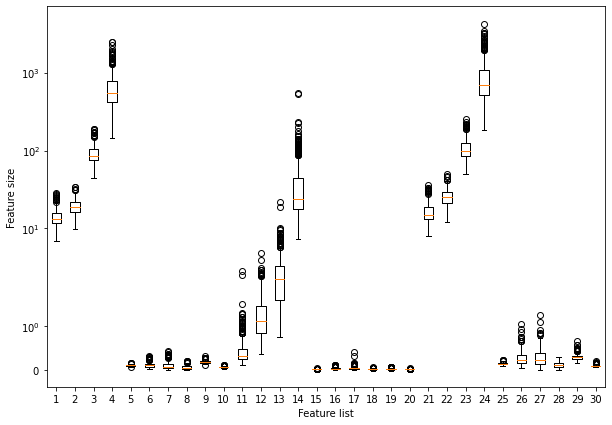

In [11]:
# 각 열의 데이터 분포 확인 

plt.figure(figsize=(10,7))
plt.boxplot(X_train) # 수염상자그림 

plt.yscale("symlog")
plt.xlabel("Feature list")
plt.ylabel("Feature size")
plt.show()

# 데이터의 각 열 마다의 Scale이 매우 다름 
# Kernelized SVM 에서는 영향이 아주 크다

<br>
<br>

#### SVM을 위한 데이터 전처리

<br>
- 열 마다의 데이터 범위가 비슷해지도록 조정 (Feature Scaling)
<br>
- 보통 열마다의 값을 0과 1 사이로 맞추는 방법을 기본적으로 사용 (Min-Max Scaling)

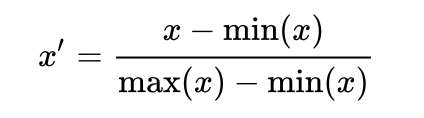

In [12]:
min_on_training = X_train.min(axis=0) # 열마다의 최소값 계산
range_on_training = (X_train - min_on_training).max(axis=0) # 분모에 해당 
X_train_scaled = (X_train - min_on_training) / range_on_training # Min-max scaling (0~1)

print("열마다의 최소값\n{}".format(X_train_scaled.min(axis=0)))
print("열마다의 최대값\n {}".format(X_train_scaled.max(axis=0)))

열마다의 최소값
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
열마다의 최대값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [13]:
df = pd.DataFrame(X_train_scaled)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.230442,0.321577,0.219404,0.122672,0.337678,0.126841,0.062980,0.113320,0.411616,0.151432,...,0.182497,0.365938,0.169032,0.081744,0.434062,0.144085,0.105112,0.314847,0.302779,0.098583
1,0.200625,0.421162,0.194527,0.103415,0.573151,0.165776,0.011729,0.037689,0.444444,0.217355,...,0.144077,0.366738,0.131979,0.061664,0.470382,0.067332,0.010663,0.069652,0.340430,0.066772
2,0.622320,0.769295,0.604036,0.474019,0.490605,0.287720,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.560799,0.198502,0.074315
3,0.312793,0.337344,0.293345,0.181888,0.291626,0.072392,0.046790,0.061531,0.259091,0.110362,...,0.269299,0.375267,0.241546,0.136134,0.223404,0.047472,0.084665,0.178608,0.151784,0.049784
4,0.459511,0.435270,0.437496,0.302906,0.242641,0.177180,0.085497,0.114662,0.396970,0.069292,...,0.400213,0.387527,0.382937,0.220901,0.196328,0.256823,0.197843,0.300965,0.613444,0.138987


In [14]:
# 테스트 데이터에도 같은 계산 적용
X_test_scaled = (X_test - min_on_training) / range_on_training

In [17]:
X_train.shape

(426, 30)

In [22]:
# 혹은 데이터의 범위를 0~1 사이로 맞추는 Min-max Normalization(정규화) 대신, 
# 평균이 0 & 표준편차가 1 이 되게끔 Standardization(표준화)를 적용할 수도 있습니다.
# 이 때는 sklearn.preprocessing.StandardScaler 를 간편하게 활용할 수 있습니다.

from sklearn.preprocessing import StandardScaler # StandardScaler  # (sklearn.preprocessing.MinMaxScaler is also available)

sc = StandardScaler()
sc.fit(X_train) # X_train 의 평균과 표준편차를 구함

# As with all the transformations, it is important to fit the scalers to the training data only, not to the full dataset (including the test set).
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

df = pd.DataFrame(X_train_scaled)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,...,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02
mean,-3.385138e-15,-1.095107e-15,4.192786e-15,-1.504274e-15,-2.205461e-15,-3.778032e-16,1.139673e-15,4.940623e-16,-4.089061e-15,-2.028372e-15,...,-7.557856e-17,-6.515393e-17,-1.223070e-15,-2.658280e-17,4.438644e-15,-1.110229e-15,-5.054642e-16,1.107617e-17,-2.450830e-15,2.719395e-15
std,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,...,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00
min,-2.023041e+00,-2.312656e+00,-1.981021e+00,-1.430312e+00,-3.160432e+00,-1.665026e+00,-1.130378e+00,-1.267483e+00,-2.692455e+00,-1.849288e+00,...,-1.715425e+00,-2.248101e+00,-1.681616e+00,-1.199403e+00,-2.677913e+00,-1.486588e+00,-1.360156e+00,-1.758873e+00,-2.106216e+00,-1.603450e+00
25%,-6.881418e-01,-7.438490e-01,-6.832187e-01,-6.592052e-01,-7.031765e-01,-7.358151e-01,-7.467001e-01,-7.333480e-01,-6.859458e-01,-7.235262e-01,...,-6.661438e-01,-7.091121e-01,-6.806635e-01,-6.331662e-01,-7.282053e-01,-6.890046e-01,-7.689892e-01,-7.662973e-01,-6.580365e-01,-6.876632e-01
50%,-2.210048e-01,-1.027265e-01,-2.398295e-01,-2.939292e-01,-2.969849e-02,-1.903184e-01,-3.438961e-01,-3.965152e-01,-6.049317e-02,-1.434774e-01,...,-2.764983e-01,-6.817629e-02,-2.910562e-01,-3.467820e-01,-1.106401e-02,-2.427903e-01,-1.990212e-01,-2.505942e-01,-1.352366e-01,-2.031163e-01
75%,4.483469e-01,5.723950e-01,4.765171e-01,3.148873e-01,6.528122e-01,5.028367e-01,4.899554e-01,6.674355e-01,5.360367e-01,4.584876e-01,...,5.498364e-01,6.226972e-01,5.398901e-01,3.403863e-01,5.816418e-01,5.725231e-01,5.529024e-01,7.033039e-01,4.595372e-01,4.556986e-01
max,3.931794e+00,3.540015e+00,3.947633e+00,5.118266e+00,3.492692e+00,4.103431e+00,4.311748e+00,3.921702e+00,4.465904e+00,5.087920e+00,...,4.034146e+00,3.945823e+00,4.236997e+00,5.747920e+00,3.933759e+00,5.306877e+00,4.959081e+00,2.670375e+00,5.918486e+00,6.974084e+00


In [23]:
# from sklearn.svm import SVC

svc = SVC(gamma='auto')
svc.fit(X_train_scaled, y_train)

print("Accuracy on Training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on Test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on Training set: 0.986
Accuracy on Test set: 0.965


In [24]:
# C나 gamma 값을 증가시켜 좀 더 복잡한 모델을 만들 수 있음

svc = SVC(C=1000) 
svc.fit(X_train_scaled, y_train)

print("Accuracy on Training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on Test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on Training set: 1.000
Accuracy on Test set: 0.958


In [25]:
# C나 gamma 값을 증가시켜 좀 더 복잡한 모델을 만들 수 있음

svc = SVC(C=1000, gamma=0.1)
svc.fit(X_train_scaled, y_train)

print("Accuracy on Training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on Test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on Training set: 1.000
Accuracy on Test set: 0.965


<br>
<br>

#### (Appendix) 최적의 Hyper Parameter 를 찾아주는 GridSearch (주석 해제 후 실행해보세요!)

In [ ]:
Hyper-Parameter Optimization 
== HPO
== Hyper-Parameter tuning
== Model tuning

Grid-Search HPO
Randomized-Search HPO
Bayesian-Search HPO # 베이지안 통계학 <-> 빈도주의 통계학 

In [ ]:
model = SVC(C=0.1, gamma=0.01, kernel='poly')

In [27]:
X_train_scaled.shape

(426, 30)

In [26]:
# K-Fold Cross-validation

from sklearn.model_selection import GridSearchCV

param_grid = {'C' : [0.1, 1, 10, 100, 1000], 
             'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],
             'kernel' : ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1)

grid.fit(X_train_scaled, y_train)

print('The best parameters are ', grid.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
The best parameters are  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
# model = SVC(C=10, gamma=0.01, kernel='rbf')
# model.fit(~~, ~~)

In [29]:
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [28]:
from sklearn.metrics import classification_report

grid_predictions = grid.predict(X_test_scaled)

print(classification_report(y_test, grid_predictions)) # Precision, Recall, F1-score 등을 확인할 수 있습니다.

print("Accuracy on Training set: {:.3f}".format(grid.score(X_train_scaled, y_train)))
print("Accuracy on Test set: {:.3f}".format(grid.score(X_test_scaled, y_test)))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        53
           1       0.98      0.99      0.98        90

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

Accuracy on Training set: 0.986
Accuracy on Test set: 0.979
